<a href="https://colab.research.google.com/github/SAIRAALMAS88/SAIRAALMAS88/blob/main/ML_Activity_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import pandas as pd

# Use pd.read_excel instead of pd.read_csv for Excel files
df = pd.read_excel("/content/drug_classification.xlsx")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(200, 6)

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
print(df.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [7]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug_Type,0


In [8]:
# Count of unique values for categorical features
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']

# Check if all categorical features exist in the DataFrame columns
for feature in categorical_features:
    if feature not in df.columns:
        print(f"Warning: Feature '{feature}' not found in DataFrame columns.")

# Calculate unique counts for features that exist in the DataFrame
categorical_unique_counts = {col: df[col].nunique() for col in categorical_features if col in df.columns}
print(categorical_unique_counts)

{'Sex': 2, 'BP': 3, 'Cholesterol': 2}


<Axes: xlabel='Age'>

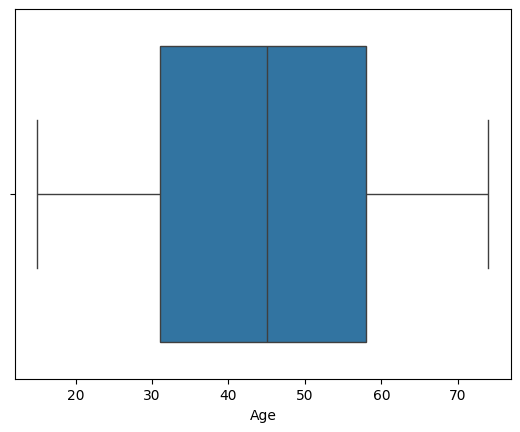

In [9]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Na_to_K'>

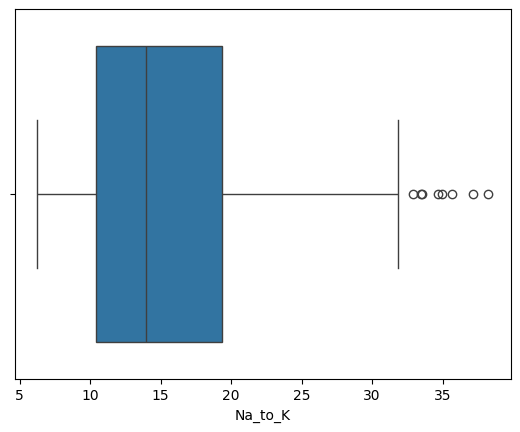

In [10]:
sns.boxplot(x=df['Na_to_K'])

In [16]:
#Checking outliers
Q1= df['Na_to_K'].quantile(0.25)
Q3= df['Na_to_K'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
# Outlier count
outlier_count = ((df['Na_to_K'] < lower_bound) | (df['Na_to_K'] > upper_bound)).sum()
print("Number of outliers:", outlier_count)


Number of outliers: 8


In [23]:
# Counting outliers
outliers = df[(df['Na_to_K'] < lower_bound) | (df['Na_to_K'] > upper_bound)]
outlier_count = outliers.shape[0]

print(year_birth_stats)
print()
print("Lower bound = ",lower_bound)
print("Upper bound = ", upper_bound)
print("Outlier Count = ",outlier_count)
outliers['Na_to_K'].sort_values().unique()


count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

Lower bound =  -2.9562500000000007
Upper bound =  32.78175
Outlier Count =  8


array([32.922, 33.486, 33.542, 34.686, 34.997, 35.639, 37.188, 38.247])

In [24]:
from scipy import stats
z_scores = np.abs(stats.zscore(df['Na_to_K']))
threshold = 3
outliers = np.where(z_scores > threshold)
print("Outliers:", outliers)


#Add z-score to dataframe for reference
df['z_score'] = z_scores

#Identify outliers: z-scores greater than 3 or less than -3
outliers = df[z_scores > threshold]
print(outliers)

#Print results
print("\n outliers:")

Outliers: (array([96]),)
    Age Sex   BP Cholesterol  Na_to_K Drug_Type   z_score
96   58   F  LOW        HIGH   38.247     DrugY  3.075618

 outliers:


In [25]:
# Printing the rows with the outliers in the 'Na_to_K' column
outlier_rows = df[(df['Na_to_K'] < lower_bound) | (df['Na_to_K'] > upper_bound)]
outlier_rows

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type,z_score
24,33,F,LOW,HIGH,33.486,DrugY,2.414907
96,58,F,LOW,HIGH,38.247,DrugY,3.075618
98,20,M,HIGH,NORMAL,35.639,DrugY,2.713691
128,47,M,LOW,NORMAL,33.542,DrugY,2.422679
131,52,M,LOW,NORMAL,32.922,DrugY,2.336638
184,18,F,HIGH,HIGH,37.188,DrugY,2.928655
188,65,M,HIGH,NORMAL,34.997,DrugY,2.624597
194,46,F,HIGH,HIGH,34.686,DrugY,2.581438


In [26]:
# Dropping the rows with outliers in the 'Year_Birth' column
df_cleaned_no_outliers = df.drop(outlier_rows.index)

# Verifying the removal by checking if these rows still exist in the cleaned dataframe
verification = df_cleaned_no_outliers[df_cleaned_no_outliers['Na_to_K'].isin([1893, 1899, 1900])]
verification.empty, df_cleaned_no_outliers.shape


(True, (192, 7))

<Axes: xlabel='Na_to_K'>

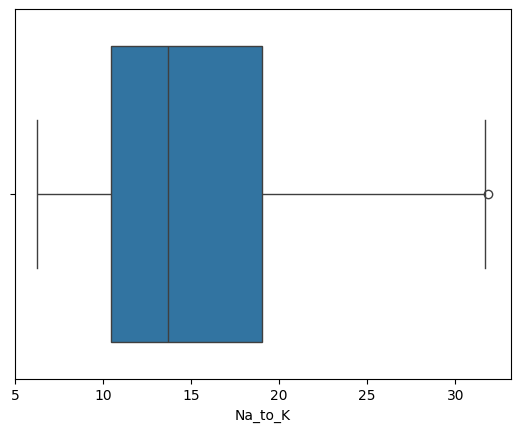

In [27]:
sns.boxplot(x=df_cleaned_no_outliers['Na_to_K'])

In [28]:
# Check the data types of the columns
print(df_cleaned_no_outliers.dtypes)

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug_Type       object
z_score        float64
dtype: object


In [30]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'BP' and 'Cholesterol'
df_cleaned_no_outliers['BP_encoded'] = label_encoder.fit_transform(df_cleaned_no_outliers['BP'])
df_cleaned_no_outliers['Cholesterol_encoded'] = label_encoder.fit_transform(df_cleaned_no_outliers['Cholesterol'])

# dropping BP and Cholestrol colmns
# Changed 'Z_score' to 'z_score' to match the existing column name
df_cleaned_no_outliers.drop(columns=['BP', 'Cholesterol','z_score'], inplace=True)

In [31]:
df_cleaned_no_outliers

,Age,Sex,Na_to_K,Drug_Type,BP_encoded,Cholesterol_encoded
0,23,F,25.355,DrugY,0,0
1,47,M,13.093,drugC,1,0
2,47,M,10.114,drugC,1,0
3,28,F,7.798,drugX,2,0
4,61,F,18.043,DrugY,1,0
...,...,...,...,...,...,...
195,56,F,11.567,drugC,1,0
196,16,M,12.006,drugC,1,0
197,52,M,9.894,drugX,2,0
198,23,M,14.020,drugX,2,1


In [32]:
df_encoded = pd.get_dummies(df_cleaned_no_outliers, columns=['Sex'], drop_first=True)

# Display the result
print(df_encoded)

     Age  Na_to_K Drug_Type  BP_encoded  Cholesterol_encoded  Sex_M
0     23   25.355     DrugY           0                    0  False
1     47   13.093     drugC           1                    0   True
2     47   10.114     drugC           1                    0   True
3     28    7.798     drugX           2                    0  False
4     61   18.043     DrugY           1                    0  False
..   ...      ...       ...         ...                  ...    ...
195   56   11.567     drugC           1                    0  False
196   16   12.006     drugC           1                    0   True
197   52    9.894     drugX           2                    0   True
198   23   14.020     drugX           2                    1   True
199   40   11.349     drugX           1                    1  False

[192 rows x 6 columns]


In [33]:
X = df_encoded.drop(columns=['Drug_Type'])  # Features
y = df_encoded['Drug_Type']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the splits
print("X_train:\n", X_train)
print("y_train:\n", y_train)
print("X_test:\n", X_test)
print("y_test:\n", y_test)

X_train:
      Age  Na_to_K  BP_encoded  Cholesterol_encoded  Sex_M
83    38   11.326           0                    1  False
112   35    9.170           1                    1   True
167   57   14.216           2                    0  False
36    32    9.445           0                    1   True
140   49    6.269           0                    1   True
..   ...      ...         ...                  ...    ...
109   23   16.850           2                    0   True
14    50   12.703           2                    0  False
93    42   29.271           1                    1  False
185   57   25.893           2                    1  False
105   37    8.968           1                    1   True

[153 rows x 5 columns]
y_train:
 83     drugA
112    drugX
167    drugX
36     drugA
140    drugA
       ...  
109    DrugY
14     drugX
93     DrugY
185    DrugY
105    drugX
Name: Drug_Type, Length: 153, dtype: object
X_test:
      Age  Na_to_K  BP_encoded  Cholesterol_encoded  Sex_M
46    

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.metrics import classification_report
#checing statstics results for out un tuned logistic regression model
print("UnTuned Logistic Regression Classification Report:\n",classification_report(y_test, y_pred_lr))

UnTuned Logistic Regression Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        13
       drugA       0.89      1.00      0.94         8
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00        13

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



In [37]:
from sklearn.metrics import accuracy_score

# Predicting the target values for the test data
y_pred_lr = lr.predict(X_test)

# Calculating accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Our Untunned logistic Regresstion is : {lr_accuracy:.3f} %")

Accuracy of Our Untunned logistic Regresstion is : 0.974 %


In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
'C': [0.01, 0.1, 1, 10],
'solver': ['liblinear', 'lbfgs'],

}
grid_lr = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
from sklearn.model_selection import GridSearchCV
param_grid = {
'C': [0.01, 0.1, 1, 10],
'solver': ['liblinear', 'lbfgs'],

}
grid_lr = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5)
grid_lr.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
y_pred_lr_tuned = grid_lr.best_estimator_.predict(X_test)

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


In [41]:
from sklearn.metrics import classification_report
#checing statstics results for out un tuned logistic regression model
print("UnTuned Logistic Regression Classification Report:\n",classification_report(y_test, y_pred_lr))

UnTuned Logistic Regression Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        13
       drugA       0.89      1.00      0.94         8
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00        13

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



In [43]:
from sklearn.metrics import accuracy_score

# Predicting the target values for the test data
y_pred_lr = lr.predict(X_test)

from sklearn.metrics import accuracy_score

# Predicting the target values for the test data
y_pred_lr = lr.predict(X_test)

# Calculating accuracy
lr_tuned_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Our Tunned logistic Regresstion is : {lr_tuned_accuracy:.2f} %")

Accuracy of Our Tunned logistic Regresstion is : 0.97 %


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluate the model
KNN_untuned_model = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", KNN_untuned_model)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.5641025641025641

Classification Report:
               precision    recall  f1-score   support

       DrugY       0.93      1.00      0.96        13
       drugA       0.38      0.62      0.48         8
       drugB       0.33      0.33      0.33         3
       drugC       0.00      0.00      0.00         2
       drugX       0.43      0.23      0.30        13

    accuracy                           0.56        39
   macro avg       0.42      0.44      0.41        39
weighted avg       0.56      0.56      0.54        39



In [46]:
# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of the KNN model : {knn_accuracy:.2f} %")

Accuracy of the KNN model : 0.56 %


In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)
print("Best Parameters for KNN:", grid_knn.best_params_)
y_pred_knn_tuned = grid_knn.best_estimator_.predict(X_test)

Best Parameters for KNN: {'n_neighbors': 3}


In [48]:
# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
knn_tuned_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of the KNN model : {knn_tuned_accuracy:.2f} %")

Accuracy of the KNN model : 0.64 %


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


untuned_rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest model : {untuned_rf_accuracy:.2f} %")

Accuracy of the Random Forest model : 0.97 %


In [52]:
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_rf.best_params_)
y_pred_rf_tuned = grid_rf.best_estimator_.predict(X_test)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=42,max_depth=None,min_samples_split=2)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [54]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest model : {rf_accuracy:.2f} %")

Accuracy of the Random Forest model : 0.97 %


In [59]:

# Logistic Regression:
print(f"Accuracy of Our UnTuned Logistic Regression Model is : {lr_tuned_accuracy:.2f} %")
print(f"Accuracy of Our Tuned Logistic Regression Model is : {lr_accuracy:.2f} %")
print("")

# KNN Classifier
# n_neighbors = 5
print(f"Accuracy of the Untuned KNN Model : {KNN_untuned_model:.2f} %")
# n_neighbors = 5
print(f"Accuracy of the Tuned KNN Model : {knn_tuned_accuracy:.2f} %")
# Logistic Regression:
print(f"Accuracy of Our UnTuned Logistic Regression Model is : {lr_tuned_accuracy:.2f} %")
print(f"Accuracy of Our Tuned Logistic Regression Model is : {lr_accuracy:.2f} %")
print("")

# KNN Classifier
# n_neighbors = 5
print(f"Accuracy of the Untuned KNN Model : {KNN_untuned_model:.2f} %")
# n_neighbors = 5
print(f"Accuracy of the Tuned KNN Model : {knn_tuned_accuracy:.2f} %")
print("")

# Random Forest
print(f"Accuracy of the Untuned Random Forest Model : {untuned_rf_accuracy:.2f} %")

Accuracy of Our UnTuned Logistic Regression Model is : 0.97 %
Accuracy of Our Tuned Logistic Regression Model is : 0.97 %

Accuracy of the Untuned KNN Model : 0.56 %
Accuracy of the Tuned KNN Model : 0.64 %
Accuracy of Our UnTuned Logistic Regression Model is : 0.97 %
Accuracy of Our Tuned Logistic Regression Model is : 0.97 %

Accuracy of the Untuned KNN Model : 0.56 %
Accuracy of the Tuned KNN Model : 0.64 %

Accuracy of the Untuned Random Forest Model : 0.97 %
